In [149]:
import pathlib

path=str(pathlib.Path().resolve())+"/assets/"

In [150]:
#!pip install -q opencv-python

In [151]:
import os
import numpy as np
import cv2 as cv
import random

def get_data(path):
    images = []  # Lista para las imágenes
    labels = []  # Lista para las etiquetas
    dirs = os.listdir(path)
    
    for i in os.listdir(path + "/" + dirs[0]):
        images.append(cv.cvtColor(cv.resize(cv.imread(path + "/" + dirs[0] + "/" + i), dsize=(64, 64),interpolation=cv.INTER_AREA),cv.COLOR_BGR2GRAY))
        labels.append(0)
    print(path + "/" + dirs[0])
    
    for i in os.listdir(path + "/" + dirs[1]):
        images.append(cv.cvtColor(cv.resize(cv.imread(path + "/" + dirs[1] + "/" + i), dsize=(64, 64),interpolation=cv.INTER_AREA),cv.COLOR_BGR2GRAY))
        labels.append(1)
    
    # Barajar las imágenes y las etiquetas de manera sincronizada
    combined = list(zip(images, labels))
    random.shuffle(combined)
    images, labels = zip(*combined)
    
    print(path + "/" + dirs[1])
    
    # Convertir las listas en arrays NumPy
    
    return np.array(images),np.array(labels) 


In [152]:
from concurrent.futures import ThreadPoolExecutor

with ThreadPoolExecutor() as executor:
    f1 = executor.submit(get_data, path+"train")
    f2 = executor.submit(get_data, path+"test")
    f3 = executor.submit(get_data, path+"val")

    X_train,y_train = f1.result()
    X_test,y_test = f2.result()
    X_val,y_val = f3.result()


C:\Users\diego.guizanlopez\Documents\BigDataEIa\IA\Sistemas_Aprendizaje_Automatico\3-Trimestre\Redes_Neuronales\Clasificacion_Imagen\Ejercicio/assets/val/NORMAL
C:\Users\diego.guizanlopez\Documents\BigDataEIa\IA\Sistemas_Aprendizaje_Automatico\3-Trimestre\Redes_Neuronales\Clasificacion_Imagen\Ejercicio/assets/val/PNEUMONIA
C:\Users\diego.guizanlopez\Documents\BigDataEIa\IA\Sistemas_Aprendizaje_Automatico\3-Trimestre\Redes_Neuronales\Clasificacion_Imagen\Ejercicio/assets/test/NORMAL
C:\Users\diego.guizanlopez\Documents\BigDataEIa\IA\Sistemas_Aprendizaje_Automatico\3-Trimestre\Redes_Neuronales\Clasificacion_Imagen\Ejercicio/assets/test/PNEUMONIA
C:\Users\diego.guizanlopez\Documents\BigDataEIa\IA\Sistemas_Aprendizaje_Automatico\3-Trimestre\Redes_Neuronales\Clasificacion_Imagen\Ejercicio/assets/train/NORMAL
C:\Users\diego.guizanlopez\Documents\BigDataEIa\IA\Sistemas_Aprendizaje_Automatico\3-Trimestre\Redes_Neuronales\Clasificacion_Imagen\Ejercicio/assets/train/PNEUMONIA


In [153]:
X_train

array([[[132, 126,  72, ...,  80,  75,  62],
        [113, 149,  80, ...,  77,  70,  58],
        [110, 134, 114, ...,  75,  68,  54],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[ 77,  75,  74, ..., 117,  63,  63],
        [ 34,  85,  74, ...,  91,  62,  60],
        [ 21,  59,  83, ...,  64,  58,  56],
        ...,
        [  1,  60,  94, ..., 152,  53,   5],
        [  2,  57, 100, ..., 164,  60,   8],
        [  3,  55,  93, ..., 159,  73,  12]],

       [[  6,   6,  40, ...,  20,  14,   5],
        [  8,   5,  43, ...,  24,  15,  11],
        [  5,   4,  36, ...,  26,  19,   8],
        ...,
        [  9,   6,   4, ...,  16,  11,   4],
        [ 14,   6,   4, ...,  19,  18,  13],
        [  8,   6,   3, ...,  15,  19,  16]],

       ...,

       [[ 28,  87, 125, ..., 124, 118,  75],
        [ 23,  85, 124, ..., 139, 123,  94],
        [ 15,  82, 122, ..., 125, 130,  88

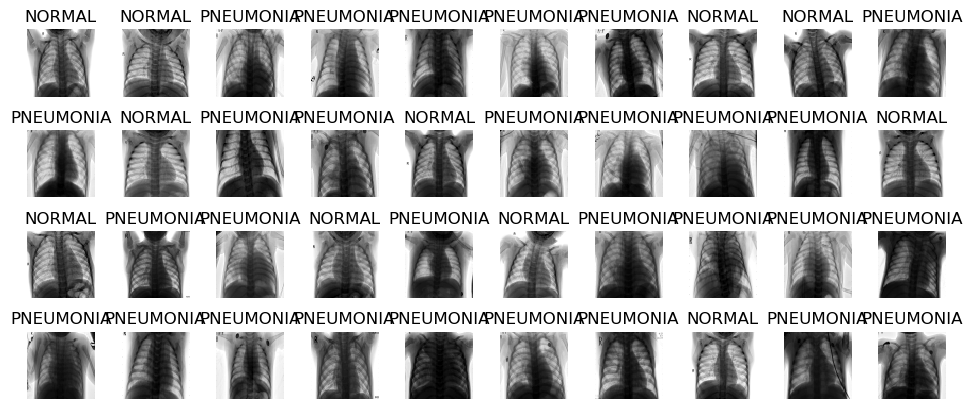

In [154]:
from matplotlib import pyplot as plt


class_names = ["NORMAL","PNEUMONIA"]

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [155]:
X_train.shape

(5216, 64, 64)

In [156]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical


In [157]:
X_test = np.concatenate((X_test,X_val,X_train[:500]),axis=0)
y_test = np.concatenate((y_test,y_val,y_train[:500]),axis=0)
X_train,y_train = X_train[500:] / 255.,y_train[500:]
X_test = X_test / 255.

In [158]:
#X_train=X_train.astype(np.uint8,copy=False)
#X_test=X_test.astype(np.uint8,copy=False)
#X_val=X_val.astype(np.uint8,copy=False)
#X_train

In [159]:
print(X_train.shape)
print(X_test.shape)

(4716, 64, 64)
(1140, 64, 64)


In [160]:
X_val

array([[[  0,   0,   0, ...,   9,   6,   6],
        [  0,   0,   0, ...,   9,   7,   6],
        [  6,   0,   4, ...,   9,   7,  11],
        ...,
        [  3,   3,   4, ...,  29, 139,  64],
        [  3,   3,   5, ...,  64, 146,  30],
        [  9,   4,   5, ..., 124,  92,  18]],

       [[  1,  20,  31, ...,  75,  64,  87],
        [  3,  15,  29, ...,  83,  62,  92],
        [  1,  10,  27, ...,  91,  63,  78],
        ...,
        [  5,   2,   2, ...,   1,   1,   5],
        [  2,   2,   2, ...,   1,   1,   2],
        [  2,   2,   1, ...,   1,   1,   2]],

       [[  0,  15,  44, ...,  94,  72,  34],
        [  4,  15,  42, ...,  95,  72,  34],
        [  1,  14,  38, ...,  96,  72,  31],
        ...,
        [  2,   2,  44, ...,   1,   2,   3],
        [  7,   1,  43, ...,   1,   2,   8],
        [  1,   1,  42, ...,   2,   2,   2]],

       ...,

       [[ 93, 106,  65, ...,   3,   0,   0],
        [110, 141,  62, ...,   1,   0,   0],
        [ 96, 117,  61, ...,   0,   0,   5

In [161]:
X_train.shape
#(1280, 64, 64, 3)

(4716, 64, 64)

In [162]:
model = models.Sequential()

# Va hacer 32 Kernels que serán 3X3 es decir
# Recogera de cada 3 pixeles el central para la nueva imagen 
# Podríamos indicar los Strides (1,1) que son las casillas que avanza
# Le decimos que sea 28 x 28 y que tenga un canal
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(X_train.shape[1],X_train.shape[2],1)))
model.add(layers.Conv2D(32,(3,3),activation="relu"))

# Se va reduciendo la imagen por lo que podemos aumentar el número de filtros, donde la imagen se nos va a la mitad
model.add(layers.MaxPooling2D((2,2)))

# Lo normal es aumentar el número de filtros en la imagen
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
#model.add(layers.MaxPooling2D((2,2)))

# Aplana la capa actual
#model.add(layers.Conv2D(128,(3,3),activation="relu"))
#model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.Flatten())

model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dense(len(class_names),activation="softmax"))

model.summary()

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     5,537,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,603,170 (21.37 MB)

 Trainable params: 5,603,170 (21.37 MB)

 Non-trainable params: 0 (0.00 B)

In [163]:
keras.utils.plot_model(model, "model.png", show_shapes=True,show_dtype=True,show_layer_names=True,)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [164]:
model.compile(loss="sparse_categorical_crossentropy",  optimizer="adam",   metrics=["accuracy"])

In [165]:

import sys

#gpus = tf.config.experimental.list_physical_devices('GPU')
#print(gpus)
#tf.config.set_visible_devices([], 'CPU') # hide the CPU
#tf.config.set_visible_devices(gpus[0], 'GPU') # unhide potentially hidden GPU
#tf.config.get_visible_devices()


cpus = tf.config.experimental.list_physical_devices('CPU')
print(cpus)
tf.config.set_visible_devices([], 'GPU')  # hide the GPU
tf.config.set_visible_devices(cpus[0], 'CPU') # unhide potentially hidden CPU
tf.config.get_visible_devices()

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

history = model.fit(X_train,y_train,epochs=sys.maxsize,validation_data=(X_test,y_test),callbacks=[early_stopping_cb])

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
Epoch 1/9223372036854775807


148/148 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.7391 - loss: 0.5349 - val_accuracy: 0.7833 - val_loss: 0.7559
Epoch 2/9223372036854775807
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9273 - loss: 0.1731 - val_accuracy: 0.8377 - val_loss: 0.5073
Epoch 3/9223372036854775807
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9592 - loss: 0.1114 - val_accuracy: 0.8246 - val_loss: 0.5782
Epoch 4/9223372036854775807
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9656 - loss: 0.0992 - val_accuracy: 0.8693 - val_loss: 0.3505
Epoch 5/9223372036854775807
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9607 - loss: 0.1023 - val_accuracy: 0.8360 - val_loss: 0.7500
Epoch 6/9223372036854775807
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.9701 - loss: 0.0905 - val_accuracy: 0.8439 - val_loss: 0.6236
Epoch 7/9223372036854775807
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.9729 - loss: 0.0767 - val_accuracy: 0.8561 - val_loss: 0.4523

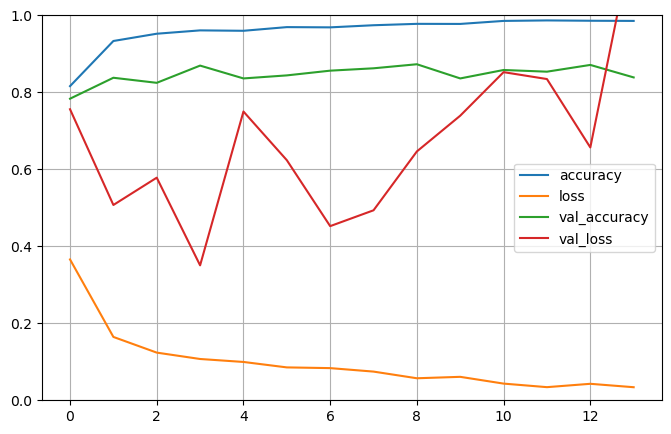

In [166]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [167]:
model.evaluate(X_test,y_test)
#accuracy: 0.8285 - loss: 0.3918

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8360 - loss: 0.4456


[0.35047900676727295, 0.8692982196807861]

In [168]:
y_test_pred = model.predict(X_test)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_test_true_labels = y_test

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


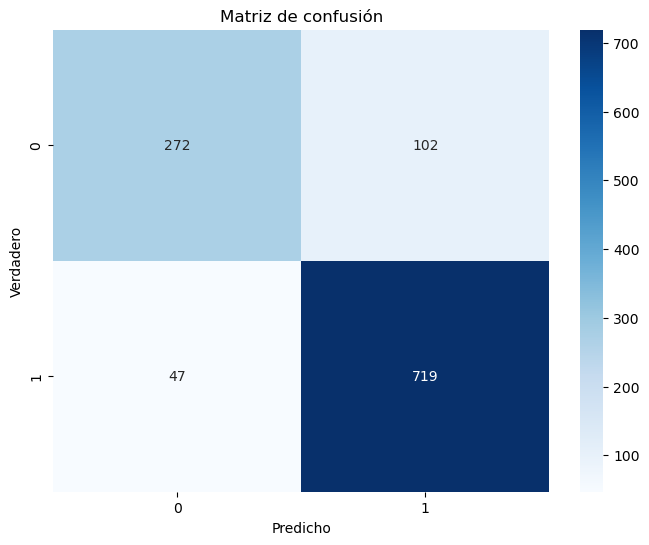

In [169]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_true_labels, y_test_pred_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.title('Matriz de confusión')
plt.show()